/tmp/ipykernel_56408/4052025372.py:27: RuntimeWarning: overflow encountered in scalar multiply
  u_new[i] = u[i] + alpha * (u[i-1] - 2*u[i] + u[i+1]) + dt * f(x[i], t)
/tmp/ipykernel_56408/4052025372.py:27: RuntimeWarning: overflow encountered in scalar add
  u_new[i] = u[i] + alpha * (u[i-1] - 2*u[i] + u[i+1]) + dt * f(x[i], t)
/tmp/ipykernel_56408/4052025372.py:27: RuntimeWarning: invalid value encountered in scalar add
  u_new[i] = u[i] + alpha * (u[i-1] - 2*u[i] + u[i+1]) + dt * f(x[i], t)


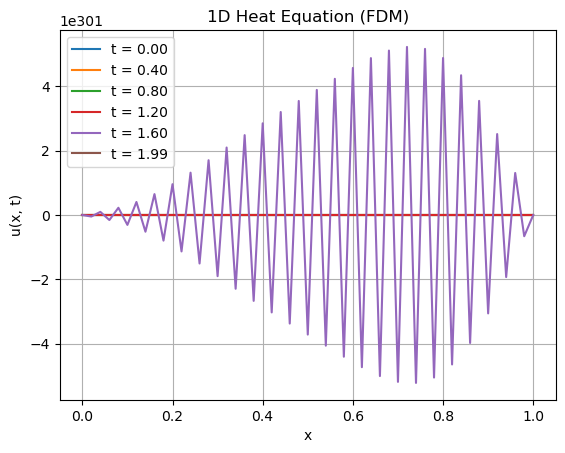

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 1.0        # Domain length
T = 2.0        # Final time
nx = 51        # Number of spatial points
nt = 200       # Number of time steps
dx = L / (nx - 1)
dt = T / nt
x = np.linspace(0, L, nx)

# Stability condition (CFL)
alpha = dt / dx**2
if alpha > 0.5:
    print("Warning: Scheme may be unstable (alpha > 0.5)")

# Initial and boundary conditions
u = np.zeros(nx)
f = lambda x, t: 10 * np.sin(np.pi * x)

# Time-stepping loop
for n in range(nt):
    u_new = u.copy()
    t = n * dt
    for i in range(1, nx-1):
        u_new[i] = u[i] + alpha * (u[i-1] - 2*u[i] + u[i+1]) + dt * f(x[i], t)
    u = u_new

    # Plot every 40 steps
    if n % 40 == 0 or n == nt - 1:
        plt.plot(x, u, label=f't = {t:.2f}')

plt.title("1D Heat Equation (FDM)")
plt.xlabel("x")
plt.ylabel("u(x, t)")
plt.legend()
plt.grid(True)
plt.show()


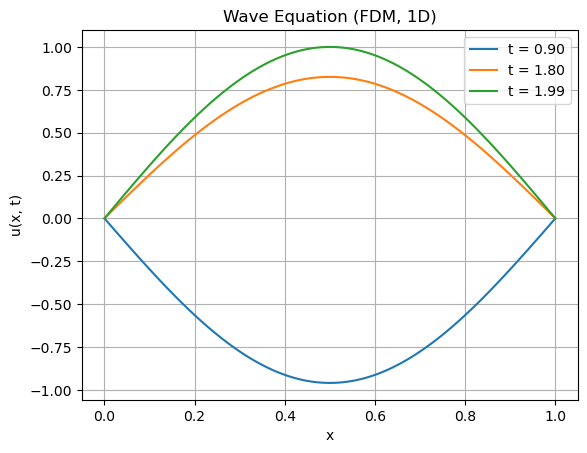

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Discretization parameters
nx = 101        # spatial points
L = 1.0
dx = L / (nx - 1)
x = np.linspace(0, L, nx)

T = 2.0         # total time
c = 1.0         # wave speed
CFL = 0.9       # CFL number (must be <= 1 for stability)
dt = CFL * dx / c
nt = int(T / dt)

# Initial condition: u(x, 0) = sin(pi x)
u0 = np.sin(np.pi * x)
u1 = u0.copy()

# Apply zero initial velocity: use Taylor expansion to get u^1
u1[1:-1] = u0[1:-1] + 0.5 * (CFL ** 2) * (u0[2:] - 2*u0[1:-1] + u0[:-2])
u1[0] = u1[-1] = 0  # enforce boundary

# Time-stepping
u = u1.copy()
for n in range(1, nt):
    u_new = u.copy()
    u_new[1:-1] = (2 * u[1:-1] - u0[1:-1] +
                   (CFL ** 2) * (u[2:] - 2 * u[1:-1] + u[:-2]))
    u_new[0] = u_new[-1] = 0  # enforce boundary

    # Update for next step
    u0, u = u, u_new

    # Plot every 100 steps
    if n % 100 == 0 or n == nt - 1:
        plt.plot(x, u, label=f't = {n*dt:.2f}')

plt.title("Wave Equation (FDM, 1D)")
plt.xlabel("x")
plt.ylabel("u(x, t)")
plt.legend()
plt.grid(True)
plt.show()
